# Centro de revisión automotriz

In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
def get_random_number():
    """
    Genera una variable aleatoria
    con una distribución uniforme.
    """
    return random.random()

def get_exponential(lambda_parameter):
    """
    Genera una variable aleatoria
    con una distribución exponencial.
    """
    random_number = get_random_number()
    value = - (math.log(1 - random_number) / float(lambda_parameter))
    return value

def get_normal():
    """
    Genera una variable aleatoria
    con una distribución normal
    """
    random_number = get_random_number()
    square_root = math.sqrt(-2 * math.log1p(random_number - 1))
    sin = math.sin(2 * math.pi * random_number)
    value = square_root * sin
    if(value < 0):
        value = 0
    return value

In [3]:
def client_arrival(actual_simulated_time):
    """
    """
    global mean_of_clients
    global number_of_clients
    global number_of_arrivals
    global arrivals
    global time
    global lambda_parameter
    global max_service_time
    global main_times
    global clients, times
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    
    mean_of_clients['node 1'] += number_of_clients['node 1'] * (actual_simulated_time - time)
    number_of_clients['node 1'] += 1
    number_of_arrivals['node 1'] += 1
    arrivals['node 1'].append(actual_simulated_time)
    
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    
    time = actual_simulated_time
    new_simulated_time = get_exponential(lambda_parameter)
    
    if(time + new_simulated_time < max_service_time):
        main_times['arrival times'] = time + new_simulated_time
    if(number_of_clients['node 1'] == 1):
        simulated_service_time = get_normal()
        main_times['service node 1'] = time + simulated_service_time
        
        
def server_node_1(actual_simulated_time):
    """
    Atiende al cliente que esté en el nodo 1
    y lo envia para el nodo 2 o 3 según
    la probabilidad asociada a estos.
    """
    global mean_of_clients
    global number_of_clients
    global time
    global number_of_departures
    global departures
    global number_of_arrivals
    global arrivals
    global main_times
    global clients, times
    
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    
    mean_of_clients['node 1'] += number_of_clients['node 1'] * (actual_simulated_time - time)
    number_of_clients['node 1'] -= 1
    number_of_departures['node 1'] += 1
    departures['node 1'].append(actual_simulated_time)
    
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    
    random_number = get_random_number()
    if(random_number < 0.4):
        mean_of_clients['node 2'] += number_of_clients['node 2'] * (actual_simulated_time - time)
        number_of_clients['node 2'] += 1
        number_of_arrivals['node 2'] += 1
        arrivals['node 2'].append(actual_simulated_time)
        if(number_of_clients['node 2'] == 1):
            new_simulated_time = get_exponential(lambda_parameter)
            main_times['service node 2'] = actual_simulated_time + new_simulated_time
    else:
        mean_of_clients['node 3'] += number_of_clients['node 3'] * (actual_simulated_time - time)
        number_of_clients['node 3'] += 1
        number_of_arrivals['node 3'] += 1
        arrivals['node 3'].append(actual_simulated_time)
        if(number_of_clients['node 3'] == 1):
            simulated_service_time = get_normal()
            main_times['service node 3'] = actual_simulated_time + simulated_service_time
    
    time = actual_simulated_time
    if(number_of_clients['node 1'] > 0):
        simulated_service_time = get_normal()
        main_times['service node 1'] = time + simulated_service_time
        
        
def server_node_2(actual_simulated_time):
    """
    Atiende al cliente que está en el
    nodo 2 y lo envía para el nodo 3.
    """
    global mean_of_clients
    global number_of_clients
    global time
    global number_of_departures
    global departures
    global number_of_arrivals
    global arrivals
    global main_times
    global clients, times
    
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    
    mean_of_clients['node 2'] += number_of_clients['node 2'] * (actual_simulated_time - time)
    number_of_clients['node 2'] -= 1
    number_of_departures['node 2'] += 1
    departures['node 2'].append(actual_simulated_time)
    
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    
    if(number_of_clients['node 2'] > 0):
        new_simulated_time = get_exponential(lambda_parameter)
        main_times['service node 2'] = actual_simulated_time + new_simulated_time
        
    mean_of_clients['node 3'] += number_of_clients['node 3'] * (actual_simulated_time - time)
    number_of_clients['node 3'] += 1
    number_of_arrivals['node 3'] += 1
    arrivals['node 3'].append(actual_simulated_time)
    if(number_of_clients['node 3'] == 1):
        simulated_service_time = get_normal()
        main_times['service node 3'] = actual_simulated_time + simulated_service_time
        

def server_node_3(actual_simulated_time):
    """
    Atiende al cliente que está en el
    nodo 3 y termina el proceso.
    """
    global mean_of_clients
    global number_of_clients
    global time
    global number_of_departures
    global departures
    global number_of_arrivals
    global arrivals
    global main_times
    global clients, times
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    
    mean_of_clients['node 3'] += number_of_clients['node 3'] * (actual_simulated_time - time)
    number_of_clients['node 3'] -= 1
    number_of_departures['node 3'] += 1
    departures['node 3'].append(actual_simulated_time)
    
    
    clients['node 1'].append(number_of_clients['node 1'])
    times['node 1'].append(time)
    clients['node 2'].append(number_of_clients['node 2'])
    times['node 2'].append(time)
    clients['node 3'].append(number_of_clients['node 3'])
    times['node 3'].append(time)
    
    
    if(number_of_clients['node 3'] > 0):
        if(number_of_clients['node 3'] < 5):
            simulated_service_time = get_normal()
        else:
            simulated_service_time = get_normal()
        
        main_times['service node 3'] = actual_simulated_time + new_simulated_time
        
    time = actual_simulated_time

In [4]:
number_of_simulations = 10
simulation_times = []
times_after_close = []
mean_system_times = []

for i in range(number_of_simulations):
    M = 9999999999 #big big number
    time = 0
    time_after_last_client = 0
    actual_simulation_time = 0
    max_service_time = 10
    
    clients = { # Eje Y
        'node 1': [0],
        'node 2': [0],
        'node 3': [0]
    }
    times = { # Eje X
        'node 1': [0],
        'node 2': [0],
        'node 3': [0]
    }

    main_times = {
        'arrival times': M,
        'service node 1': M,
        'service node 2': M,
        'service node 3': M
    }

    number_of_arrivals = {
        'node 1': 0,
        'node 2': 0,
        'node 3': 0
    }
    number_of_departures = {
        'node 1': 0,
        'node 2': 0,
        'node 3': 0
    }
    number_of_clients = {
        'node 1': 0,
        'node 2': 0,
        'node 3': 0
    }

    arrivals = {
        'node 1': [],
        'node 2': [],
        'node 3': []
    }
    departures = {
        'node 1': [],
        'node 2': [],
        'node 3': []
    }

    mean_of_clients = {
        'node 1': 0,
        'node 2': 0,
        'node 3': 0
    }

    mean_system_time = 0
    lambda_parameter = 1


    actual_simulated_time = get_exponential(lambda_parameter)

    if(actual_simulated_time > max_service_time):
        time_after_last_client = 0
        mean_system_time = 0
        mean_of_clients['node 1'] = 0
        mean_of_clients['node 2'] = 0
        mean_of_clients['node 3'] = 0
    else:
        client_arrival(actual_simulated_time)
        counter = 0
        while(main_times['arrival times'] != M
              or main_times['service node 1'] != M
              or main_times['service node 2'] != M
              or main_times['service node 3'] != M):
                
            if(min(main_times, key=lambda x: main_times[x]) == 'arrival times'):
                new_simulated_time = main_times['arrival times']
                main_times['arrival times'] = M
                client_arrival(new_simulated_time)
            if(min(main_times, key=lambda x: main_times[x]) == 'service node 1'):
                new_simulated_time = main_times['service node 1']
                main_times['service node 1'] = M
                server_node_1(new_simulated_time)
            if(min(main_times, key=lambda x: main_times[x]) == 'service node 2'):
                new_simulated_time = main_times['service node 2']
                main_times['service node 2'] = M
                server_node_2(new_simulated_time)
            if(min(main_times, key=lambda x: main_times[x]) == 'service node 3'):
                new_simulated_time = main_times['service node 3']
                main_times['service node 3'] = M
                server_node_3(new_simulated_time)

        time_after_last_client = max(0, time - max_service_time)
        accumulated_1 = 0
        accumulated_2 = 0
        accumulated_3 = 0

        counter = 0
        while(counter < number_of_arrivals['node 1']):
            accumulated_1 += departures['node 1'][counter] - arrivals['node 1'][counter]
            counter += 1

        counter = 0
        while(counter < number_of_arrivals['node 2']):
            accumulated_2 += departures['node 2'][counter] - arrivals['node 2'][counter]
            counter += 1

        counter = 0
        while(counter < number_of_arrivals['node 3']):
            accumulated_3 += departures['node 3'][counter] - arrivals['node 3'][counter]
            counter += 1

        try:
            mean_system_time = ((accumulated_1  / number_of_arrivals['node 1'])
                    + (0.4 * accumulated_2  / number_of_arrivals['node 2']) 
                    + (accumulated_3  / number_of_arrivals['node 3']))
        except Exception:
            pass
        

        mean_of_clients['node 1'] /= time
        mean_of_clients['node 2'] /= time
        mean_of_clients['node 3'] /= time
        
        mean_system_times.append(mean_system_time)
        simulation_times.append(time)
        times_after_close.append(time_after_last_client)

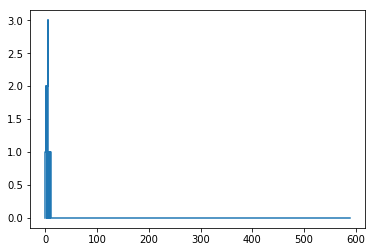

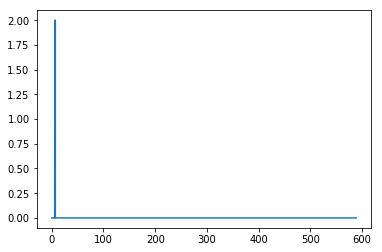

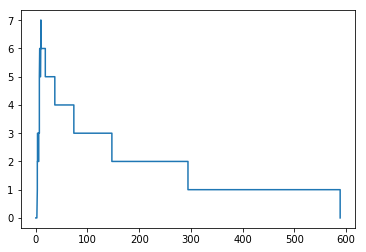

Simulaciones realizadas: 10
Tiempo de simulación promedio: 3125.249139833582
Tiempo de servicio promedio después del cierre: 3115.249139833582
Tiempo medio promedio del sistema: 490.7443013705938


In [5]:
plt.plot(times['node 1'], clients['node 1'])
plt.show()
plt.plot(times['node 2'], clients['node 2'])
plt.show()
plt.plot(times['node 3'], clients['node 3'])
plt.show()

print("Simulaciones realizadas: {}".format(len(simulation_times)))
print("Tiempo de simulación promedio: {}".format(sum(simulation_times) / len(simulation_times)))
print("Tiempo de servicio promedio después del cierre: {}".format(sum(times_after_close) / len(times_after_close)))
print("Tiempo medio promedio del sistema: {}".format(sum(mean_system_times) / len(mean_system_times)))